In [215]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

plt.rcParams['figure.figsize'] = (10, 4)
plt.style.use('default')

In [216]:
salesA = pd.read_csv("D:\PROGRAMMING\Datasets\supermarket_sales - Sheet1.csv")
salesA.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [217]:
print('The number of rows are : ', salesA.shape[0])
print('The number of cols are : ', salesA.shape[1])

The number of rows are :  1000
The number of cols are :  17


In [218]:
salesA.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [219]:
salesA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [220]:
numeric_cols = list(salesA.select_dtypes(include=['int', 'float']))
numeric_cols

['Unit price',
 'Quantity',
 'Tax 5%',
 'Total',
 'cogs',
 'gross margin percentage',
 'gross income',
 'Rating']

> 1. Imputation

In [221]:
##Checking for the missing values
salesA.isna().sum()

##There are no missing values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [222]:
##Checking for duplicates
salesA.duplicated().value_counts()

##There are no duplicate values either

False    1000
Name: count, dtype: int64

> 2. Dealing with outliers

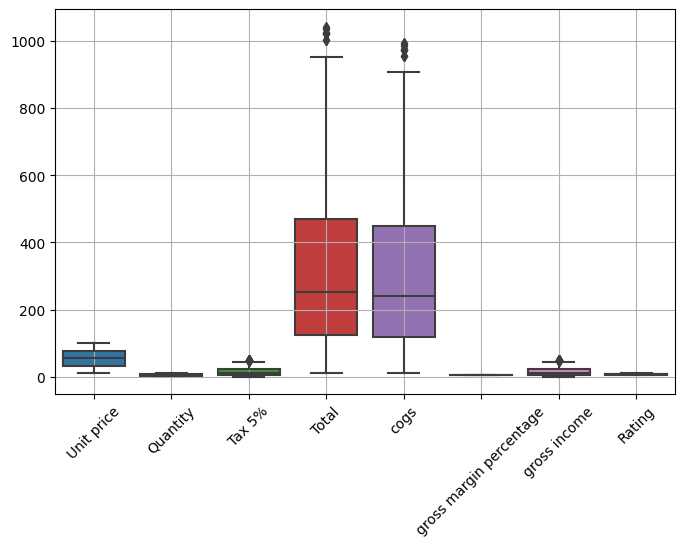

In [223]:
plt.figure(figsize=(8, 5))
sb.boxplot(data=salesA)
plt.xticks(rotation = 45)
plt.grid()
plt.show()


In [224]:
def remove_outliers(attr):
    Q1 = salesA[attr].quantile(0.25)
    Q3 = salesA[attr].quantile(0.75)

    IQR = Q3 - Q1

    lower_extreme = Q1-1.5*IQR
    upper_extreme = Q3+1.5*IQR

    salesA.loc[salesA[attr] < lower_extreme, attr] = salesA[attr].mean()
    salesA.loc[salesA[attr] > upper_extreme, attr] = salesA[attr].mean()

In [225]:
for k in numeric_cols:
    remove_outliers(k)

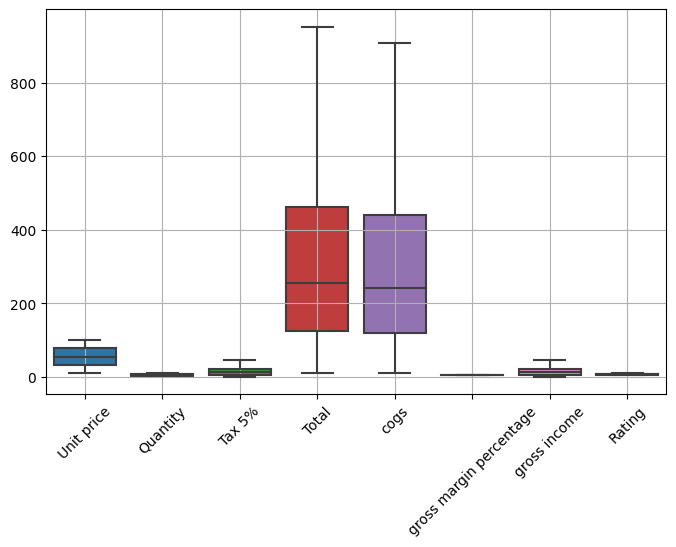

In [226]:
plt.figure(figsize=(8, 5))
sb.boxplot(data=salesA)
plt.xticks(rotation = 45)
plt.grid()
plt.show()

##Outliers successfully replaced with mean

> 3. Variable Transformation

In [227]:
salesB = salesA.copy()

In [228]:
##log transformation
##It is applied to those attributes where is skewed distribution, majority values in narrow range

salesB["Unit_price_log"] = np.log(salesB["Unit price"])
salesB["tax_5%_log"] = np.log(salesB["Tax 5%"])
salesB["quantity_log"] = np.log(salesB["Quantity"])
salesB["gross_income_log"] = np.log(salesB["gross income"])

salesB.head(3)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Unit_price_log,tax_5%_log,quantity_log,gross_income_log
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,...,13:08,Ewallet,522.83,4.761905,26.1415,9.1,4.313346,3.263524,1.945910,3.263524
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,...,10:29,Cash,76.40,4.761905,3.8200,9.6,2.726545,1.340250,1.609438,1.340250
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,...,13:23,Credit card,324.31,4.761905,16.2155,7.4,3.835790,2.785968,1.945910,2.785968


> 4. Descritization or Binning / Feature Creation

In [229]:
bins_no = [4.0, 6.0, 8.0, 10.0]
bins_label = ['low', 'medium', 'high']
salesB["Rating_ranges"] = pd.cut(salesB["Rating"], bins = bins_no, labels=bins_label)


bins_label = ['very_low', 'low', 'medium', 'high', 'very_high']
salesB["Unit_price_ranges"] = pd.qcut(salesB["Unit price"], q = 5, labels=bins_label)

salesB.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,cogs,gross margin percentage,gross income,Rating,Unit_price_log,tax_5%_log,quantity_log,gross_income_log,Rating_ranges,Unit_price_ranges
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,...,522.83,4.761905,26.1415,9.1,4.313346,3.263524,1.945910,3.263524,high,high
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,...,76.40,4.761905,3.8200,9.6,2.726545,1.340250,1.609438,1.340250,high,very_low
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,...,324.31,4.761905,16.2155,7.4,3.835790,2.785968,1.945910,2.785968,medium,low
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,...,465.76,4.761905,23.2880,8.4,4.064229,3.147938,2.079442,3.147938,high,medium
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,...,604.17,4.761905,30.2085,5.3,4.457945,3.408123,1.945910,3.408123,low,very_high


> 5. Feature Splitting

In [230]:
salesB["Date"] = pd.to_datetime(salesB["Date"])
salesB["Month"] = salesB["Date"].dt.month
salesB.head(4)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,gross margin percentage,gross income,Rating,Unit_price_log,tax_5%_log,quantity_log,gross_income_log,Rating_ranges,Unit_price_ranges,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.141500,548.971500,...,4.761905,26.141500,9.1,4.313346,3.263524,1.945910,3.263524,high,high,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.820000,80.220000,...,4.761905,3.820000,9.6,2.726545,1.340250,1.609438,1.340250,high,very_low,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.215500,340.525500,...,4.761905,16.215500,7.4,3.835790,2.785968,1.945910,2.785968,medium,low,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.288000,489.048000,...,4.761905,23.288000,8.4,4.064229,3.147938,2.079442,3.147938,high,medium,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.208500,634.378500,...,4.761905,30.208500,5.3,4.457945,3.408123,1.945910,3.408123,low,very_high,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1.0,2.017500,42.367500,...,4.761905,2.017500,6.2,3.697591,0.701859,0.000000,0.701859,medium,low,1
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10.0,15.379369,322.966749,...,4.761905,15.379369,4.4,4.578621,2.733027,2.302585,2.733027,low,very_high,3
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1.0,1.592000,33.432000,...,4.761905,1.592000,7.7,3.460723,0.464991,0.000000,0.464991,medium,low,2
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1.0,3.291000,69.111000,...,4.761905,3.291000,4.1,4.186924,1.191191,0.000000,1.191191,low,high,2


> 6. Categorical Encoding

In [231]:
salesB.select_dtypes(include="object").nunique()

Invoice ID       1000
Branch              3
City                3
Customer type       2
Gender              2
Product line        6
Time              506
Payment             3
dtype: int64

In [232]:
cols = ["Branch", "City", "Customer type", "Product line", "Payment"]

In [233]:
salesC = pd.get_dummies(salesB, columns=cols)       ## One-hot encoding
salesC = salesC.replace({True:1, False:0})          ## label encoding
salesC.head(4)

,Invoice ID,Gender,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,...,Customer type_Normal,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,750-67-8428,Female,74.69,7.0,26.1415,548.9715,2019-01-05,13:08,522.83,4.761905,...,0,0,0,0,1,0,0,0,0,1
1,226-31-3081,Female,15.28,5.0,3.8200,80.2200,2019-03-08,10:29,76.40,4.761905,...,1,1,0,0,0,0,0,1,0,0
2,631-41-3108,Male,46.33,7.0,16.2155,340.5255,2019-03-03,13:23,324.31,4.761905,...,1,0,0,0,0,1,0,0,1,0
3,123-19-1176,Male,58.22,8.0,23.2880,489.0480,2019-01-27,20:33,465.76,4.761905,...,0,0,0,0,1,0,0,0,0,1


In [234]:
salesC["Gender"] = salesC["Gender"].replace({'Male':1, 'Female':0})     ## label encoding
salesC.head(4)

,Invoice ID,Gender,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,...,Customer type_Normal,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,750-67-8428,0,74.69,7.0,26.1415,548.9715,2019-01-05,13:08,522.83,4.761905,...,0,0,0,0,1,0,0,0,0,1
1,226-31-3081,0,15.28,5.0,3.8200,80.2200,2019-03-08,10:29,76.40,4.761905,...,1,1,0,0,0,0,0,1,0,0
2,631-41-3108,1,46.33,7.0,16.2155,340.5255,2019-03-03,13:23,324.31,4.761905,...,1,0,0,0,0,1,0,0,1,0
3,123-19-1176,1,58.22,8.0,23.2880,489.0480,2019-01-27,20:33,465.76,4.761905,...,0,0,0,0,1,0,0,0,0,1


> 7. Scalling

In [239]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

##Create a new dataframe with numerical attributes]
numeric_df = salesB[numeric_cols]

#Minmax scaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numeric_df)
numeric_df_minmax = pd.DataFrame(scaled_data, columns=numeric_cols)
numeric_df_minmax

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,0.718847,0.666667,0.571955,0.571955,0.571955,0.0,0.571955,0.850000
1,0.057855,0.444444,0.073890,0.073890,0.073890,0.0,0.073890,0.933333
2,0.403316,0.666667,0.350474,0.350474,0.350474,0.0,0.350474,0.566667
3,0.535603,0.777778,0.508284,0.508284,0.508284,0.0,0.508284,0.733333
4,0.848131,0.666667,0.662702,0.662702,0.662702,0.0,0.662702,0.216667
...,...,...,...,...,...,...,...,...
995,0.336782,0.000000,0.033671,0.033671,0.033671,0.0,0.033671,0.366667
996,0.971295,1.000000,0.331817,0.331817,0.331817,0.0,0.331817,0.066667
997,0.242101,0.000000,0.024176,0.024176,0.024176,0.0,0.024176,0.616667
998,0.620160,0.000000,0.062087,0.062087,0.062087,0.0,0.062087,0.016667


In [241]:
##Standard z-score scaller
scale = StandardScaler()
salesC[numeric_cols] = scale.fit_transform(salesC[numeric_cols])
salesC.head(4)

,Invoice ID,Gender,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,...,Customer type_Normal,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,750-67-8428,0,0.718160,0.509930,0.982203,0.982203,2019-01-05,13:08,0.982203,0.0,...,0,0,0,0,1,0,0,0,0,1
1,226-31-3081,0,-1.525303,-0.174540,-0.999675,-0.999675,2019-03-08,10:29,-0.999675,0.0,...,1,1,0,0,0,0,0,1,0,0
2,631-41-3108,1,-0.352781,0.509930,0.100895,0.100895,2019-03-03,13:23,0.100895,0.0,...,1,0,0,0,0,1,0,0,1,0
3,123-19-1176,1,0.096214,0.852165,0.728847,0.728847,2019-01-27,20:33,0.728847,0.0,...,0,0,0,0,1,0,0,0,0,1
